In [1]:
import pymunk
import random
import pygame
import cv2
import numpy as np
import os
import pymunk.pygame_util 
import time
import json
import csv

pygame 2.2.0 (SDL 2.26.4, Python 3.9.20)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
img_dir     = "/home/turgay/falling_objects_dataset/temp_i"  
csv_dir     = "/home/turgay/falling_objects_dataset/temp_c"

In [3]:
world_width  = 512
world_height = 512
xCenter      = world_width / 2

In [102]:
49//8

6

In [103]:
def dim():
    return random.randint(50, 100)

def xpos(prev_block):
    prev_w = prev_block[2]  # width of the previous block
    prev_x = prev_block[0]  # X position of the previous block
    return random.randint( prev_x - prev_w + 5,  prev_x + prev_w - 5  )

def ypos(prev_block, h):
    prev_y = prev_block[1]  # Y position of the previous block
    prev_h = prev_block[3]  # height of the previous block
    return prev_y - ((prev_h/2)   +   (h  /  2)  ) 


def add_block(prev_block, is_first):
    w = dim()
    h = dim()
    x = xCenter if is_first else xpos(prev_block)
    y = ypos(prev_block, h)

    return (x, y, w, h)

def make_tower_world():
    
    ground_block = (xCenter, world_height-25, 100, 50)  
    
    block1 = add_block(ground_block, True)
    block2 = add_block(block1, False)
    block3 = add_block(block2, False)
    block4 = add_block(block3, False)
    return [ground_block, block1, block2, block3, block4]

In [67]:
def save_img(batch, iteration, screen):
    
#---------------------------------------------------------------------------------------------
    pygame.image.save(screen, f"{img_dir}/{np.int64(iteration / 50) + (batch * 20) }.png")
#---------------------------------------------------------------------------------------------            

In [68]:
def save_csv(block_data, batch, iteration):
    
#---------------------------------------------------------------------------------------------    
    block_data2 = []
    
    blocks_for_csv        =   [data["block"] for data in block_data[:]]
    masses_for_csv        =   [data["mass"] for data in block_data[:]]
    color_r_for_csv       =   [data["color_r"] for data in block_data[:]]   
    color_g_for_csv       =   [data["color_g"] for data in block_data[:]]
    color_b_for_csv       =   [data["color_b"] for data in block_data[:]]
        
    for block, mass, color_r, color_g, color_b in zip(blocks_for_csv, masses_for_csv, color_r_for_csv, color_g_for_csv, color_b_for_csv):
        data = {
            "position_x": block[0],
            "position_y": block[1],
            "width": block[2],
            "height": block[3],
            "mass": mass, 
            "color_r": color_r,
            "color_g": color_g,
            "color_b": color_b,
            "time"      : iteration / 50
        }
        block_data2.append(data)

#---------------------------------------------------------------------------------------------    
    
    csv_filename = f"{csv_dir}/{np.int64(iteration / 50) + (batch * 20)}.csv"
    
    # Check if CSV file exists to append or write headers
    file_exists = os.path.exists(csv_filename)
    with open(csv_filename, 'a', newline='') as csvfile:
        fieldnames = ["position_x", "position_y", "width", "height", "mass", "color_r", "color_g", "color_b", "time"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        # Write headers only if file doesn't exist
        if not file_exists:
            writer.writeheader()
        
        # Write the data of the blocks to the CSV file
        writer.writerows(block_data2)


In [69]:
def start_video(batch, fps=60):

    video_path   =   f"{video_dir}/{np.int64(batch) }.avi"
    
    video_writer = cv2.VideoWriter(
                                    video_path,
                                    cv2.VideoWriter_fourcc(*'XVID'),
                                    fps,
                                    (world_width, world_height)
                                    )
    return video_writer

In [25]:
def record_frames(video_writer, screen):

    frame = pygame.surfarray.array3d(screen)  # Get frame data from Pygame
    frame = np.transpose(frame, (1, 0, 2))    # Transpose to match OpenCV format
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # Convert to OpenCV color format
    video_writer.write(frame)  # Write frame to video file

In [26]:
def stop_video(video_writer):
    video_writer.release()

In [106]:
def animate_tower(batch):
    
    pygame.init()
    
    space         = pymunk.Space()
    space.gravity = (0, 9.8)

    screen        = pygame.display.set_mode((world_width, world_height))
    draw_options  = pymunk.pygame_util.DrawOptions(screen)

    # Add ground 
    ground = pymunk.Segment(space.static_body, (0, world_height), (world_width, world_height), 0) 
    space.add(ground)

    # Create blocks for the tower
    blocks     = make_tower_world()
    block_data = []

    for block in blocks:
        
        mass          = random.randint(1, 10)
        moment        = pymunk.moment_for_box(mass, (block[2], block[3]))   # mass, size(width, height)   obj= (x, y, w, h) 
        body          = pymunk.Body(mass, moment)
        body.position = (block[0], block[1]) 

        shape   = pymunk.Poly.create_box(body, (block[2], block[3]))
        
        r, g, b = random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)
        shape.color = (r , g, b, 1.0)

        space.add(body, shape)
        block_data.append({"mass": mass, "block": block, "color_r": r, "color_g": g, "color_b": b })

    
    iteration = 0
    while iteration <= 1000:  
                   
        screen.fill((255, 255, 255))  
        space.debug_draw(draw_options)
        pygame.display.flip()

        if iteration % 50  == 0:
                
            save_img(batch, iteration, screen)
            save_csv(block_data, batch, iteration)

        space.step(1 / 60.0)  # Step the physics simulation
        iteration += 1
        

    pygame.quit()

In [107]:
for i in range(5):
    
    animate_tower(i) 



In [40]:
100 * 5 / (60)

8.333333333333334

###   Take one image from simulation : 

In [112]:
def animate_tower():
    
    pygame.init()
    
    space         = pymunk.Space()
    space.gravity = (0, 9.8)

    screen        = pygame.display.set_mode((world_width, world_height))
    draw_options  = pymunk.pygame_util.DrawOptions(screen)

    # Add ground 
    ground = pymunk.Segment(space.static_body, (0, world_height), (world_width, world_height), 0) 
    space.add(ground)

    # Create blocks for the tower
    blocks     = make_tower_world()
    block_data = []

    for block in blocks:
        
        mass          = random.randint(1, 10)
        moment        = pymunk.moment_for_box(mass, (block[2], block[3]))   # mass, size(width, height)   obj= (x, y, w, h) 
        body          = pymunk.Body(mass, moment)
        body.position = (block[0], block[1]) 

        shape   = pymunk.Poly.create_box(body, (block[2], block[3]))
        
        r, g, b = random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)
        shape.color = (r , g, b, 1.0)

        space.add(body, shape)
        # Assign random color for each block
        r, g, b = random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)
        shape.color = (r , g , b , 1.0)  # Normalize to [0, 1] for pygame
        
        # Collect block data (x, y, width, height, mass, r, g, b)
        block_data.append([block[0], block[1], block[2], block[3], mass, r, g, b, 1])  # Time is set to 1 for now


    iteration = 0
    while iteration <= 1000:  
        screen.fill((255, 255, 255))  # Clear the screen to white
        space.debug_draw(draw_options)  # Draw the physics objects
        pygame.display.flip()  # Update the display

        if iteration % 50 == 0:
            # Capture the current screen as a numpy array
            img_array = pygame.surfarray.array3d(screen)  # Shape: (width, height, 3)
            img_array = np.transpose(img_array, (1, 0, 2))  # Transpose to get the shape (height, width, 3)
            
            # Normalize the pixel values to [0, 1]
            img_array = img_array.astype(np.float32) / 255.0
            
            # Convert block data to numpy array and then to a torch tensor (5x9)
            block_tensor = np.array(block_data, dtype=np.float32)

            # Return the image and block data as a tuple
            return img_array, block_tensor
            break 
        
        space.step(1 / 60.0)  # Step the physics simulation
        iteration += 1

    pygame.quit()

In [113]:
img, csv   =   animate_tower() 

In [114]:
img.shape, csv.shape

((512, 512, 3), (5, 9))

In [120]:
def simulate(csv_tensor):

    pygame.init()

    # Initialize Pygame and Pymunk
    screen_width, screen_height = 512, 512
    screen                      = pygame.Surface((screen_width, screen_height))
    space                       = pymunk.Space()
    draw_options                = pymunk.pygame_util.DrawOptions(screen)

 
    ground         = pymunk.Segment(space.static_body, (0, 512), (512, 512), 0)  # height as radius
    space.add(ground)

    # Blocks (rows 1-4 of the tensor)
    for block_data in csv_tensor[:]:
        pos_x, pos_y, width, height, mass, color_r, color_g, color_b, _ = block_data

        # Create a dynamic body and its shape
        moment        = pymunk.moment_for_box(mass, (width, height))
        body          = pymunk.Body(mass, moment)
        body.position = (pos_x, pos_y)
        shape         = pymunk.Poly.create_box(body, (width, height))

        # Assign color to the block
        shape.color = (color_r , color_g , color_b, 1)  # Normalize RGBA
        space.add(body, shape)

    screen.fill((255, 255, 255))     # Clear the surface with a white background
    space.debug_draw(draw_options)   # Draw the blocks to the screen 

    # Extract the screen image as a NumPy array
    img_array = pygame.surfarray.array3d(screen)
    img_array = img_array.transpose(1, 0, 2)  # Convert to (H, W, C)

    pygame.quit()
    return img_array


In [121]:
img_array   =   simulate(csv)

In [122]:
img_array.shape

(512, 512, 3)

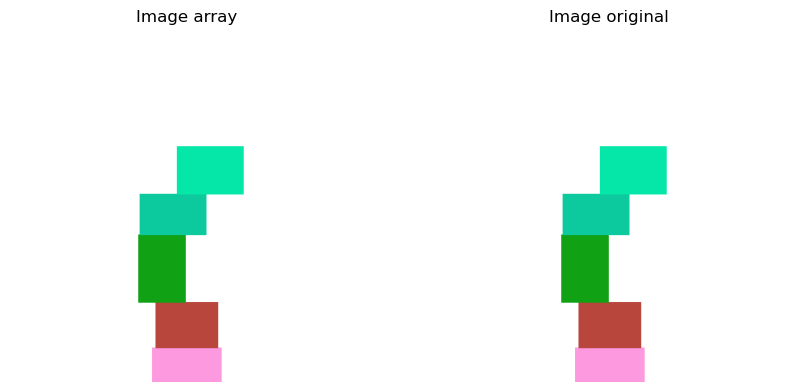

In [123]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image in the first subplot
axes[0].imshow(img_array)
axes[0].axis('off')  # Hide the axes for a cleaner plot
axes[0].set_title("Image array")  # Optional: Title for the first image

# Plot the second image in the second subplot
axes[1].imshow(img)
axes[1].axis('off')  # Hide the axes for a cleaner plot
axes[1].set_title("Image original")  # Optional: Title for the second image

# Show the plot
plt.show()